In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [ ]:
fmt = '%Y%m%d'
pd.set_option('display.max_columns', 49)
df1 = pd.read_csv('tennis_atp/atp_matches_2017.csv')
df2 = pd.read_csv('tennis_atp/atp_matches_2018.csv')
df3 = pd.read_csv('tennis_atp/atp_matches_2019.csv')
df4 = pd.read_csv('tennis_atp/atp_matches_2020.csv')
df5 = pd.read_csv('tennis_atp/atp_matches_2021.csv')

df = pd.concat((df1, df2, df3, df4, df5), axis=0)

def clean():
    df['tourney_date'] =  df['tourney_date'].apply(lambda x: dt.strptime(str(x), fmt))
    df['winner_name'] = df['winner_name'].str.lower().str.replace(' ', '_')
    df['loser_name'] = df['loser_name'].str.lower().str.replace(' ', '_')
    df['tourney_name'] = df['tourney_name'].str.lower().str.replace(' ', '_')
    df['surface'] = df['surface'].str.lower()

In [ ]:
clean()
df.head(5)

In [ ]:
general_stats = df.describe()
general_stats['winner_rank']

In [ ]:
tourneyLevels = {
  0: ["A", "C", "G", "M", "F", "S", "D"],
  1: ["G", "M", "B"]
}


def filt(p1:str="", tourneyLevel:int=0, surface:str="", startDate:str="", endDate:str="", threshhold:int=5) -> pd.DataFrame:
    """
      Filters the dataframe by the given parameters.
    """
    surface = surface.lower()
    p1 = p1.lower().replace(' ', '_')
    startDate = dt.strptime(str(startDate), fmt)
    endDate = dt.strptime(str(endDate), fmt)

    tourneyLevel = tourneyLevels[tourneyLevel]
    filtre = (((df['winner_name'] == p1) | (df['loser_name'] == p1)) &
       (endDate >= df['tourney_date']) & (df['tourney_date'] >= startDate) &
        df['tourney_level'].isin(tourneyLevel) &
        df['surface'].str.contains('hard'))
        
    filtered = df.loc[filtre]
    num_matches = filtered.shape[0]

    if num_matches < threshhold:
        return False
    

    return filtered
    

filt(p1='federico_delbonis', tourneyLevel=0, surface='hard', startDate="20000101", endDate='20301212')

get_mean() -> Pega todas as médias das entradas de dados do jogador, de acordo com o filtro e retorna uma lista dela

O objetivo no final é fazer uma table em que cada row é um jogador e as colunas são as médias deles

Dai compara as medias de cada, analizando com partidas anteriores e ver se cada media mais corresponde com winner ou loser

In [ ]:
def get_player_filtered_means(p1:str="", tourneyLevel:int=0, surface:str="", startDate:str="", endDate:str="") -> pd.DataFrame:
    """
        Returns a dataframe with the means of the filtered dataframe.
    """

    p1_table = filt(p1=p1, tourneyLevel=tourneyLevel, surface=surface, startDate=startDate, endDate=endDate)
    
    if p1_table is False:
        return False
        
    p1_win_table = p1_table[p1_table['winner_name'] == p1]
    p1_lose_table = p1_table[p1_table['loser_name'] == p1]
    try:
        qnty_won = p1_table['winner_name'].value_counts().loc[p1] 
        win_pct = qnty_won / p1_table['winner_name'].shape[0]
    except KeyError:
        qnty_won = 0
        win_pct = 0
    
    loss_pct = 1 - win_pct
    
    # p1_stats = p1_table.describe()
    p1_win_stats = p1_win_table.describe()
    p1_lose_stats = p1_lose_table.describe()
    
    
    stats = {'win_pct': win_pct, 'loss_pct': loss_pct,
        'when_win_w_ace_mean': p1_win_stats.loc['mean', 'w_ace'],
        'when_win_w_df_mean': p1_win_stats.loc['mean', 'w_df'],
        'when_win_w_svpt_mean': p1_win_stats.loc['mean', 'w_svpt'],
        'when_win_w_1stIn_mean': p1_win_stats.loc['mean', 'w_1stIn'],
        'when_win_w_1stWon_mean': p1_win_stats.loc['mean', 'w_1stWon'],
        'when_win_w_2ndWon_mean': p1_win_stats.loc['mean', 'w_2ndWon'],
        'when_win_w_SvGms_mean': p1_win_stats.loc['mean', 'w_SvGms'],
        'when_win_w_bpSaved_mean': p1_win_stats.loc['mean', 'w_bpSaved'],
        'when_win_w_bpFaced_mean': p1_win_stats.loc['mean', 'w_bpFaced'],
        'when_win_l_ace_mean': p1_win_stats.loc['mean', 'l_ace'],
        'when_win_l_df_mean': p1_win_stats.loc['mean', 'l_df'],
        'when_win_l_svpt_mean': p1_win_stats.loc['mean', 'l_svpt'],
        'when_win_l_1stIn_mean': p1_win_stats.loc['mean', 'l_1stIn'],
        'when_win_l_1stWon_mean': p1_win_stats.loc['mean', 'l_1stWon'],
        'when_win_l_2ndWon_mean': p1_win_stats.loc['mean', 'l_2ndWon'],
        'when_win_l_SvGms_mean': p1_win_stats.loc['mean', 'l_SvGms'],
        'when_win_l_bpSaved_mean': p1_win_stats.loc['mean', 'l_bpSaved'],
        'when_win_winner_rank_mean': p1_win_stats.loc['mean', 'winner_rank'],
        'when_win_l_bpFaced_mean': p1_win_stats.loc['mean', 'l_bpFaced'],
        'when_win_l_bpFaced_mean': p1_win_stats.loc['mean', 'l_bpFaced'],
        'when_win_l_bpFaced_mean': p1_win_stats.loc['mean', 'l_bpFaced'],
        'when_win_l_bpFaced_mean': p1_win_stats.loc['mean', 'l_bpFaced'],
        'when_lose_w_ace_mean': p1_lose_stats.loc['mean', 'w_ace'],
        'when_lose_w_df_mean': p1_lose_stats.loc['mean', 'w_df'],
        'when_lose_w_svpt_mean': p1_lose_stats.loc['mean', 'w_svpt'],
        'when_lose_w_1stIn_mean': p1_lose_stats.loc['mean', 'w_1stIn'],
        'when_lose_w_1stWon_mean': p1_lose_stats.loc['mean', 'w_1stWon'],
        'when_lose_w_2ndWon_mean': p1_lose_stats.loc['mean', 'w_2ndWon'],
        'when_lose_w_SvGms_mean': p1_lose_stats.loc['mean', 'w_SvGms'],
        'when_lose_w_bpSaved_mean': p1_lose_stats.loc['mean', 'w_bpSaved'],
        'when_lose_w_bpFaced_mean': p1_lose_stats.loc['mean', 'w_bpFaced'],
        'when_lose_l_ace_mean': p1_lose_stats.loc['mean', 'l_ace'],
        'when_lose_l_df_mean': p1_lose_stats.loc['mean', 'l_df'],
        'when_lose_l_svpt_mean': p1_lose_stats.loc['mean', 'l_svpt'],
        'when_lose_l_1stIn_mean': p1_lose_stats.loc['mean', 'l_1stIn'],
        'when_lose_l_1stWon_mean': p1_lose_stats.loc['mean', 'l_1stWon'],
        'when_lose_l_2ndWon_mean': p1_lose_stats.loc['mean', 'l_2ndWon'],
        'when_lose_l_SvGms_mean': p1_lose_stats.loc['mean', 'l_SvGms'],
        'when_lose_l_bpSaved_mean': p1_lose_stats.loc['mean', 'l_bpSaved'],
        'when_lose_l_bpFaced_mean': p1_lose_stats.loc['mean', 'l_bpFaced'],
        'when_lose_loser_rank_mean': p1_lose_stats.loc['mean', 'loser_rank'],
        'num_games_played': p1_table.shape[0],
     }
    return pd.DataFrame(stats, index=[p1])

get_player_filtered_means(p1='federico_delbonis', tourneyLevel=0, surface='hard', startDate="20000101", endDate='20301212')

In [ ]:
def generate_mean_df(tourneyLevel:int=0, surface:str="", startDate:str="", endDate:str="", threshhold:int=5) -> pd.DataFrame:
    """
    Generates a dataframe with the means of the stats for each player
    """
    all_players_stats_df = pd.DataFrame()
    players = []
    for i in df["winner_name"]:
        if i not in players:
            players.append(i)
    for i in df["loser_name"]:
        if i not in players:
            players.append(i)
    for i in players:
        playr_df = get_player_filtered_means(p1=i, tourneyLevel=tourneyLevel, surface=surface, startDate=startDate, endDate=endDate)

        if playr_df is False:
            continue
        else:
            all_players_stats_df = pd.concat((all_players_stats_df, playr_df), axis=0)
    
    return all_players_stats_df


# generate_mean_df(tourneyLevel=0, surface='hard', startDate="20200106", endDate='20210131')

In [ ]:
mean = generate_mean_df(tourneyLevel=0, surface='hard', startDate="20100101", endDate='20301231')
mean

Control cell 1 -> Betting only on the one with biggest win_pct

Results: 
    A threshold of how many games a player have played yields little difference. Right bets with this method results in about 65%.
    But, if the players win average is over 60%, it's correct close to 90% of the times.

Interesting:
    Even if the players win average is around 50%, the bet win average is over 70%.
    There is not a linear relation of win_avg to bet_win_avg. It looks more like a exponential relation. Witch somewhat makes sense.
    Bad players (win_avg < 50%) will usually play only with other bad players (as it looks like, worst players than them).



In [ ]:
def win_avg_bet(p1:str="", p2:str="", tourneyLevel:int=0, surface:str="", startDate:str="", endDate:str=""):
    """
        Bets on the player with the higher win average;
        If the win average is the same, does not bet.
    """
    p1_stats = mean.loc[p1]
    p2_stats = mean.loc[p2]

    # print(p1_stats)
    if p1_stats['win_pct'] > p2_stats['win_pct']:
        return (p1, pd.concat((p1_stats, p2_stats), axis=1).fillna(0).transpose())
    elif p2_stats['win_pct'] > p1_stats['win_pct']:
        return (p2, pd.concat((p1_stats, p2_stats), axis=1).fillna(0).transpose())
    else:
        return (False, pd.concat((p1_stats, p2_stats), axis=1).fillna(0).transpose())
#viktor_troicki yoshihito_nishioka 0 hard 20150102 20170102
# win_avg_bet(p1='viktor_troicki', p2='yoshihito_nishioka', tourneyLevel=0, surface='hard', startDate="20150102", endDate='20170102')[1]

In [ ]:
def bet_all_win_avg():
    mathces = df[['tourney_level', 'tourney_date', 'winner_name', 'loser_name', 'surface']].to_numpy()

    gen_results = {'Right': 0, 'Wrong': 0, 'BetsTotal': 0, 'Total': 0}

    # each key (0...9) is a range of 10 percetual points.
    # Eg: key 0 is 0-9, key 1 is 10-19, key 2 is 20-29, etc.
    # The objective is to save how many wins we have betting on a player with a each win_pct range
    margin_dict = {
                    0: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    1: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    2: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    3: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    4: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    5: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    6: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    7: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    8: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    9: {'Right': 0, 'Wrong': 0, 'Total': 0},
                    10: {'Right': 0, 'Wrong': 0, 'Total': 0}
                }

    margin_df = pd.DataFrame(margin_dict)
    
    for i in mathces:
        if i[0] in tourneyLevels[0]:
            tourneyLevel = 0
        else:
            tourneyLevel = 1


        startDate = pd.to_datetime(pd.to_datetime(i[1])-pd.DateOffset(years= 2)).strftime("%Y%m%d")
        endDate = pd.to_datetime(pd.to_datetime(i[1])-pd.DateOffset(days= 2)).strftime("%Y%m%d")
        winner = i[2]
        loser = i[3]
        surface = i[4]

        try:
            (bet, players_stats) = win_avg_bet(p1=winner, p2=loser, tourneyLevel=tourneyLevel, surface=surface, startDate=startDate, endDate=endDate)
        except KeyError:
            continue
        
        if bet == False:
            continue

        if bet == winner:
            gen_results['Right'] = gen_results['Right']+1
            gen_results['BetsTotal'] = gen_results['BetsTotal']+1

            right = True
            
        elif bet == loser:
            gen_results['Wrong'] = gen_results['Wrong']+1
            gen_results['BetsTotal'] = gen_results['BetsTotal']+1
            
            right = False

        else:
            pass
        
        player_win_pct = players_stats.loc[winner, 'win_pct']*100

        if right:
            margin_df.loc['Right', int(player_win_pct//10)] = margin_df.loc['Right', int(player_win_pct//10)] + 1
        else:
            margin_df.loc['Wrong', int(player_win_pct//10)] = margin_df.loc['Wrong', int(player_win_pct//10)] + 1

        margin_df.loc['Total', player_win_pct//10] = margin_df.loc['Total', player_win_pct//10]+1

        gen_results['Total'] = gen_results['Total']+1
            
    print(f"% certa -> {gen_results['Right']/gen_results['BetsTotal']}")
    print(f"% errada -> {gen_results['Wrong']/gen_results['BetsTotal']}")
    return gen_results, margin_df


(gen_results, margin_df) = bet_all_win_avg()

In [ ]:
margin_df

<AxesSubplot:title={'center':'Graph 1: Correct bet average given players win average'}>

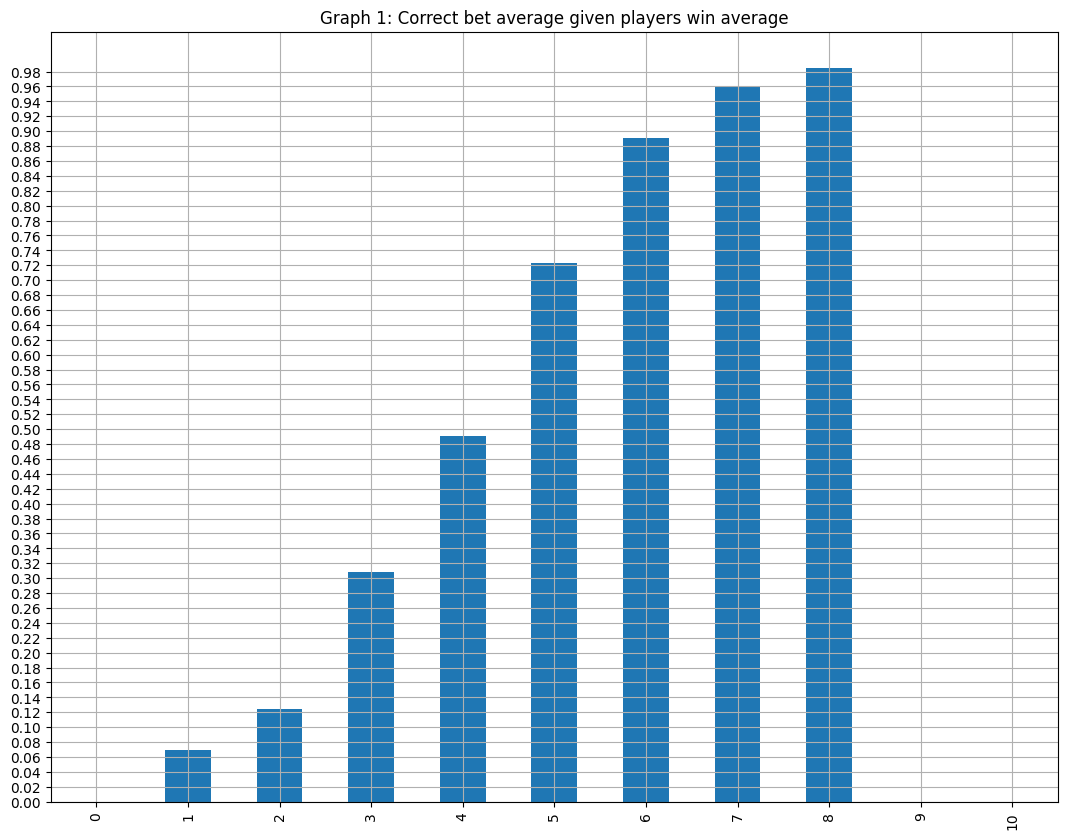

In [13]:
mean_betwin_pct = margin_df.loc['Right', :]/margin_df.loc['Total', :]
# Plot bar graph wint y axis as percentage of wins and big size
mean_betwin_pct.plot(kind='bar', yticks=np.arange(0, 1, step=0.02),grid=True, figsize=(13,10), title="Graph 1: Correct bet average given players win average" )